In [1]:
%config Completer.use_jedi = False 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

## 1 - Data undertanding and drop of unasable columns

We re going to have a first look on understanding of the differrent varables and to clean / drop the columns that are not usable / going to produce noise in further analysis

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Data/windProject.csv')
df

forecast dt unixtime forecast dt iso  slice dt unixtime  \
0               1550275200      2019-02-16         1550307600   
1               1550275200      2019-02-16         1550318400   
2               1550275200      2019-02-16         1550329200   
3               1550275200      2019-02-16         1550340000   
4               1550275200      2019-02-16         1550350800   
...                    ...             ...                ...   
6341            1621382400      2021-05-19         1621414800   
6342            1621382400      2021-05-19         1621425600   
6343            1621382400      2021-05-19         1621436400   
6344            1621382400      2021-05-19         1621447200   
6345            1621382400      2021-05-19         1621458000   

             slice dt iso        lat       lon  temperature  dew_point  \
0     2019-02-16 09:00:00  36.013158 -5.598892        13.79      11.13   
1     2019-02-16 12:00:00  36.013158 -5.598892        13.81      11.16   
2     2019-02-16 15:00:00  36.013158 -5.598892        13.82      11.15   
3     2019-02-16 18:00:00  36.013158 -5.598892        13.77      11.27   
4     2019-02-16 21:00:00  36.013158 -5.598892        13.74      11.24   
...                   ...        ...       ...          ...        ...   
6341  2021-05-19 09:00:00  36.013158 -5.598892        23.05      12.91   
6342  2021-05-19 12:00:00  36.013158 -5.598892        24.45      11.55   
6343  2021-05-19 15:00:00  36.013158 -5.598892        22.65      12.45   
6344  2021-05-19 18:00:00  36.013158 -5.598892        19.66      16.55   
6345  2021-05-19 21:00:00  36.013158 -5.598892        17.80      17.16   

      pressure  ground_pressure  humidity  clouds  wind_speed  wind_deg  \
0     1021.601         1020.681    83.994   100.0   25.963871    95.202   
1     1022.066         1021.490    84.064    96.0   25.437090    93.856   
2     1020.887         1020.461    83.926    92.0   23.938390    93.883   
3     1020.964         1020.196    84.583    94.0   19.924360    95.812   
4     1022.636         1021.323    84.845    88.0   16.271885    94.213   
...        ...              ...       ...     ...         ...       ...   
6341  1018.467         1006.124    52.600    41.9    1.315980   231.962   
6342  1018.233         1005.913    44.200    28.7    4.089839    78.455   
6343  1018.215         1005.855    52.500    25.3   11.151810    68.753   
6344  1018.845         1006.444    82.600    21.5   11.254834    61.292   
6345  1020.865         1008.397    96.000    28.3   11.595006    59.161   

       rain  snow  ice  fr_rain  convective             snow_depth  \
0     0.125   0.0  0.0      0.0       0.125  999900026055400900000   
1     0.375   0.0  0.0      0.0       0.375  999900026055400900000   
2     0.188   0.0  0.0      0.0       0.188  999900026055400900000   
3     0.312   0.0  0.0      0.0       0.312  999900026055400900000   
4     0.000   0.0  0.0      0.0       0.000  999900026055400900000   
...     ...   ...  ...      ...         ...                    ...   
6341  0.000   0.0  0.0      0.0       0.000                      0   
6342  0.000   0.0  0.0      0.0       0.000                      0   
6343  0.000   0.0  0.0      0.0       0.000                      0   
6344  0.000   0.0  0.0      0.0       0.000                      0   
6345  0.000   0.0  0.0      0.0       0.000                      0   

      accumulated  hours  rate  Direction N-S  Direction E-W Compass  \
0           0.125    3.0   0.0      -0.090667       0.995881       E   
1           0.375    6.0   0.0      -0.067249       0.997736       E   
2           0.188    3.0   0.0      -0.067719       0.997704       E   
3           0.312    6.0   0.0      -0.101265       0.994860       E   
4           0.000    3.0   0.0      -0.073464       0.997298       E   
...           ...    ...   ...            ...            ...     ...   
6341        0.000    3.0   0.0      -0.616184      -0.787602      SW   
6342        0.000 

Descrption of features:

- main
 - main.pressure Atmospheric pressure (on the sea level), hPa
 - main.grnd_pressure Atmospheric pressure (on the surface), hPa
 - main.temp Temperature
 - main.dew_point Temperature of the dew point
 - main.humidity Humidity, %
-precipitation
 - precipitation.snow_depth Depth of snow, cm
 - precipitation.snow Snow water equivalent, mm
 - precipitation.rain Rain, mm
 - precipitation.hours Number of hours for which precipitation values are calculated
 - precipitation.rate Intensity, mm/s
 - precipitation.fr_rain Freezing rain, mm
 - precipitation.ice Ice pellets, mm
-wind
 - wind.speed Wind speed
 - wind.deg Wind direction, degrees (meteorological)
-clouds
 - clouds.all Cloudiness, %
 
- dt Date for which the forecast is made, unix, UTC

In [3]:
df.columns

Index(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime',
       'slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate', 'Direction N-S', 'Direction E-W',
       'Compass', 'DateTime', 'Tarifa_WindGust', 'Tarifa_Wind',
       'Tarifa_WindDirection', 'Tarifa_Direction N-S', 'Tarifa_Direction E-W',
       'Tarifa Compass'],
      dtype='object')

In [4]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate','Compass']
targets = ['Tarifa_WindGust', 'Tarifa_Wind','Tarifa Compass'] 
# For the visualization we will use the compass. For the ML/F Eng wind direction N/S E/W will be used. 

In [5]:
df[features].corr()

temperature  dew_point  pressure  ground_pressure  humidity  \
temperature         1.000000   0.815398 -0.333442        -0.316762 -0.266256   
dew_point           0.815398   1.000000 -0.323006        -0.295276  0.336644   
pressure           -0.333442  -0.323006  1.000000         0.793675  0.002387   
ground_pressure    -0.316762  -0.295276  0.793675         1.000000  0.017251   
humidity           -0.266256   0.336644  0.002387         0.017251  1.000000   
clouds             -0.208218  -0.028811 -0.067360        -0.150087  0.304492   
wind_speed          0.011852   0.104432 -0.061401         0.037137  0.147175   
wind_deg           -0.156536  -0.297980 -0.073926        -0.113974 -0.238506   
rain               -0.137409  -0.056016 -0.221961        -0.220076  0.143142   
snow                     NaN        NaN       NaN              NaN       NaN   
ice                      NaN        NaN       NaN              NaN       NaN   
fr_rain                  NaN        NaN       NaN              NaN       NaN   
convective         -0.131792  -0.056855 -0.224700        -0.261332  0.124964   
accumulated        -0.145424  -0.063249 -0.232001        -0.228353  0.146045   
hours               0.025188  -0.006748 -0.014917        -0.010052 -0.052349   
rate               -0.047952  -0.012710 -0.108551        -0.102413  0.065221   

                   clouds  wind_speed  wind_deg      rain  snow  ice  fr_rain  \
temperature     -0.208218    0.011852 -0.156536 -0.137409   NaN  NaN      NaN   
dew_point       -0.028811    0.104432 -0.297980 -0.056016   NaN  NaN      NaN   
pressure        -0.067360   -0.061401 -0.073926 -0.221961   NaN  NaN      NaN   
ground_pressure -0.150087    0.037137 -0.113974 -0.220076   NaN  NaN      NaN   
humidity         0.304492    0.147175 -0.238506  0.143142   NaN  NaN      NaN   
clouds           1.000000    0.168482 -0.106444  0.240666   NaN  NaN      NaN   
wind_speed       0.168482    1.000000 -0.159149  0.111101   NaN  NaN      NaN   
wind_deg        -0.106444   -0.159149  1.000000  0.026979   NaN  NaN      NaN   
rain             0.240666    0.111101  0.026979  1.000000   NaN  NaN      NaN   
snow                  NaN         NaN       NaN       NaN   NaN  NaN      NaN   
ice                   NaN         NaN       NaN       NaN   NaN  NaN      NaN   
fr_rain               NaN         NaN       NaN       NaN   NaN  NaN      NaN   
convective       0.219665    0.110534  0.070328  0.465169   NaN  NaN      NaN   
accumulated      0.242737    0.099871  0.033482  0.999284   NaN  NaN      NaN   
hours            0.005923    0.010175 -0.004225  0.078265   NaN  NaN      NaN   
rate             0.089334    0.036672 -0.000719  0.634625   NaN  NaN      NaN   

                 convective  accumulated     hours      rate  
temperature       -0.131792    -0.145424  0.025188 -0.047952  
dew_point         -0.056855    -0.063249 -0.006748 -0.012710  
pressure          -0.224700    -0.232001 -0.014917 -0.108551  
ground_pressure   -0.261332    -0.228353 -0.010052 -0.102413  
humidity           0.124964     0.146045 -0.052349  0.065221  
clouds             0.219665     0.242737  0.005923  0.089334  
wind_speed         0.110534     0.099871  0.010175  0.036672  
wind_deg           0.070328     0.033482 -0.004225 -0.000719  
rain               0.465169     0.999284  0.078265  0.634625  
snow                    NaN          NaN       NaN       NaN  
ice                     NaN          NaN       NaN       NaN  
fr_rain                 NaN          NaN       NaN       NaN  
convective         1.000000     0.467587  0.003808  0.180335  
accumulated        0.467587     1.000000  0.080863  0.683239  
hours              0.003808     0.080863  1.000000 -0.006786  
rate               0.180335     0.683239 -0.006786  1.000000

In [6]:
print(df['ice'].sum())
print(df['snow'].sum())
print(df['fr_rain'].sum())
print(df['rate'].sum())

0.0
0.0
0.0
0.026


In [7]:
# This columns are either empty/not relevant for our project 
df.drop(columns=['ice','snow','fr_rain', 'rate'], inplace=True)

In [8]:
df.dtypes

forecast dt unixtime      int64
forecast dt iso          object
slice dt unixtime         int64
slice dt iso             object
lat                     float64
lon                     float64
temperature             float64
dew_point               float64
pressure                float64
ground_pressure         float64
humidity                float64
clouds                  float64
wind_speed              float64
wind_deg                float64
rain                    float64
convective              float64
snow_depth               object
accumulated             float64
hours                   float64
Direction N-S           float64
Direction E-W           float64
Compass                  object
DateTime                 object
Tarifa_WindGust         float64
Tarifa_Wind             float64
Tarifa_WindDirection    float64
Tarifa_Direction N-S    float64
Tarifa_Direction E-W    float64
Tarifa Compass           object
dtype: object

In [9]:
df['slice dt iso'].equals(df['DateTime'])

True

- We used this two dates to merge the dataframe so we can drop one of them, 'DateTime' 
- Additionally we are going to drop also 
 - *forecast dt unixtime* *(remember from Data Cleaning that we used the 00.00 UTM time forecast for each 24 hours forcast, we dont need this information for the next steps)*
 -  forecast dt iso *(redundant with forecast dt unixtime)*
 - slice dt unixtime *(redundant with slice dt iso)
 - snow_depth 'The values given are erratic and in any case does are not relevant for this project'

In [10]:
df.drop(columns=['forecast dt unixtime', 'forecast dt iso' ,'slice dt unixtime','DateTime', 'snow_depth'], inplace=True)

In [11]:
df

slice dt iso        lat       lon  temperature  dew_point  \
0     2019-02-16 09:00:00  36.013158 -5.598892        13.79      11.13   
1     2019-02-16 12:00:00  36.013158 -5.598892        13.81      11.16   
2     2019-02-16 15:00:00  36.013158 -5.598892        13.82      11.15   
3     2019-02-16 18:00:00  36.013158 -5.598892        13.77      11.27   
4     2019-02-16 21:00:00  36.013158 -5.598892        13.74      11.24   
...                   ...        ...       ...          ...        ...   
6341  2021-05-19 09:00:00  36.013158 -5.598892        23.05      12.91   
6342  2021-05-19 12:00:00  36.013158 -5.598892        24.45      11.55   
6343  2021-05-19 15:00:00  36.013158 -5.598892        22.65      12.45   
6344  2021-05-19 18:00:00  36.013158 -5.598892        19.66      16.55   
6345  2021-05-19 21:00:00  36.013158 -5.598892        17.80      17.16   

      pressure  ground_pressure  humidity  clouds  wind_speed  wind_deg  \
0     1021.601         1020.681    83.994   100.0   25.963871    95.202   
1     1022.066         1021.490    84.064    96.0   25.437090    93.856   
2     1020.887         1020.461    83.926    92.0   23.938390    93.883   
3     1020.964         1020.196    84.583    94.0   19.924360    95.812   
4     1022.636         1021.323    84.845    88.0   16.271885    94.213   
...        ...              ...       ...     ...         ...       ...   
6341  1018.467         1006.124    52.600    41.9    1.315980   231.962   
6342  1018.233         1005.913    44.200    28.7    4.089839    78.455   
6343  1018.215         1005.855    52.500    25.3   11.151810    68.753   
6344  1018.845         1006.444    82.600    21.5   11.254834    61.292   
6345  1020.865         1008.397    96.000    28.3   11.595006    59.161   

       rain  convective  accumulated  hours  Direction N-S  Direction E-W  \
0     0.125       0.125        0.125    3.0      -0.090667       0.995881   
1     0.375       0.375        0.375    6.0      -0.067249       0.997736   
2     0.188       0.188        0.188    3.0      -0.067719       0.997704   
3     0.312       0.312        0.312    6.0      -0.101265       0.994860   
4     0.000       0.000        0.000    3.0      -0.073464       0.997298   
...     ...         ...          ...    ...            ...            ...   
6341  0.000       0.000        0.000    3.0      -0.616184      -0.787602   
6342  0.000       0.000        0.000    6.0       0.200138       0.979768   
6343  0.000       0.000        0.000    3.0       0.362389       0.932027   
6344  0.000       0.000        0.000    6.0       0.480346       0.877079   
6345  0.000       0.000        0.000    3.0       0.512627       0.858611   

     Compass  Tarifa_WindGust  Tarifa_Wind  Tarifa_WindDirection  \
0          E        35.118709    17.624149                  72.0   
1          E        35.053915    21.835803                  86.0   
2          E        34.859531    20.539909                  82.0   
3          E        35.766656    23.326080                  87.0   
4          E              NaN          NaN                  83.0   
...      ...              ...          ...                   ...   
6341      SW         6.933029     3.239733                 249.0   
6342     NEE        20.215936    12.829344                 102.0   
6343     NEE        28.768832    17.948123                  74.0   
6344     NEE        27.861707    17.818533                  72.0   
6345     NEE        30.971851    16.587435                  69.0   

      Tarifa_Direction N-S  Tarifa_Direction E-W Tarifa Compass  
0                 0.309017              0.951057            NEE  
1                 0.069756              0.997564              E  
2                 0.139173              0.990268              E  
3                 0.052336              0.998630              E  
4                 0.121869              0.992546              E  
...                    ...                   ...            ...  
6341             -0

In [12]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'accumulated', 'hours', 'Direction N-S',
       'Direction E-W', 'Compass', 'Tarifa_WindGust', 'Tarifa_Wind',
       'Tarifa_WindDirection', 'Tarifa_Direction N-S', 'Tarifa_Direction E-W',
       'Tarifa Compass'],
      dtype='object')

In [13]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'accumulated', 'hours','Compass']
targets = ['Tarifa_WindGust', 'Tarifa_Wind','Tarifa Compass'] 

<AxesSubplot:>

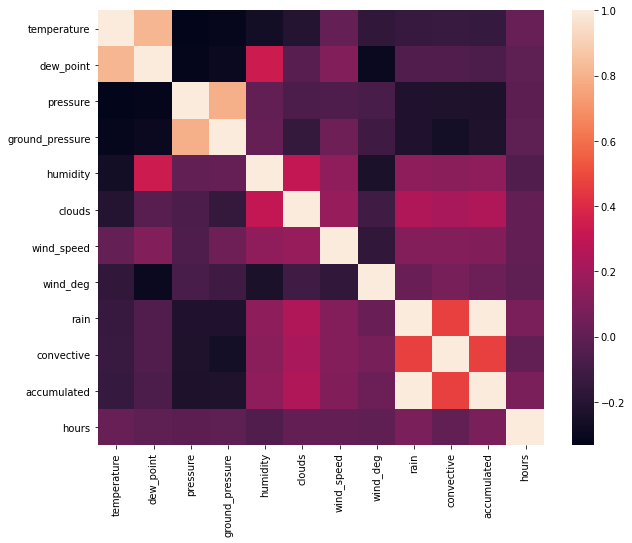

In [15]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot =True) # There are strong correlation betwwen T dew point and pressure groudn pressure

- The features **rain <-> accumulated** are correlated in 0.9999 so we are going to drp accumulated. 
- **Temperature <-> dew points and pressure** <-> ground pressure  have a correlation of 0.8, by now we maintain them, just to take into consideration for next steps



In [16]:
df.drop(columns=['accumulated'])

In [17]:
df['hours'].value_counts() 


3.0    3176
6.0    2377
Name: hours, dtype: int64

'hour' column tells us for how long the rain is forecasted (1 perid of 3 h or 2 period of 3 hour). 
Because of we already have the rain forecasted per 3h period, this column will bring redundant information so we are going to drop it too.

In [19]:
df.drop(columns=['hours'], inplace=True)

In [20]:
df

slice dt iso        lat       lon  temperature  dew_point  \
0     2019-02-16 09:00:00  36.013158 -5.598892        13.79      11.13   
1     2019-02-16 12:00:00  36.013158 -5.598892        13.81      11.16   
2     2019-02-16 15:00:00  36.013158 -5.598892        13.82      11.15   
3     2019-02-16 18:00:00  36.013158 -5.598892        13.77      11.27   
4     2019-02-16 21:00:00  36.013158 -5.598892        13.74      11.24   
...                   ...        ...       ...          ...        ...   
6341  2021-05-19 09:00:00  36.013158 -5.598892        23.05      12.91   
6342  2021-05-19 12:00:00  36.013158 -5.598892        24.45      11.55   
6343  2021-05-19 15:00:00  36.013158 -5.598892        22.65      12.45   
6344  2021-05-19 18:00:00  36.013158 -5.598892        19.66      16.55   
6345  2021-05-19 21:00:00  36.013158 -5.598892        17.80      17.16   

      pressure  ground_pressure  humidity  clouds  wind_speed  wind_deg  \
0     1021.601         1020.681    83.994   100.0   25.963871    95.202   
1     1022.066         1021.490    84.064    96.0   25.437090    93.856   
2     1020.887         1020.461    83.926    92.0   23.938390    93.883   
3     1020.964         1020.196    84.583    94.0   19.924360    95.812   
4     1022.636         1021.323    84.845    88.0   16.271885    94.213   
...        ...              ...       ...     ...         ...       ...   
6341  1018.467         1006.124    52.600    41.9    1.315980   231.962   
6342  1018.233         1005.913    44.200    28.7    4.089839    78.455   
6343  1018.215         1005.855    52.500    25.3   11.151810    68.753   
6344  1018.845         1006.444    82.600    21.5   11.254834    61.292   
6345  1020.865         1008.397    96.000    28.3   11.595006    59.161   

       rain  convective  Direction N-S  Direction E-W Compass  \
0     0.125       0.125      -0.090667       0.995881       E   
1     0.375       0.375      -0.067249       0.997736       E   
2     0.188       0.188      -0.067719       0.997704       E   
3     0.312       0.312      -0.101265       0.994860       E   
4     0.000       0.000      -0.073464       0.997298       E   
...     ...         ...            ...            ...     ...   
6341  0.000       0.000      -0.616184      -0.787602      SW   
6342  0.000       0.000       0.200138       0.979768     NEE   
6343  0.000       0.000       0.362389       0.932027     NEE   
6344  0.000       0.000       0.480346       0.877079     NEE   
6345  0.000       0.000       0.512627       0.858611     NEE   

      Tarifa_WindGust  Tarifa_Wind  Tarifa_WindDirection  \
0           35.118709    17.624149                  72.0   
1           35.053915    21.835803                  86.0   
2           34.859531    20.539909                  82.0   
3           35.766656    23.326080                  87.0   
4                 NaN          NaN                  83.0   
...               ...          ...                   ...   
6341         6.933029     3.239733                 249.0   
6342        20.215936    12.829344                 102.0   
6343        28.768832    17.948123                  74.0   
6344        27.861707    17.818533                  72.0   
6345        30.971851    16.587435                  69.0   

      Tarifa_Direction N-S  Tarifa_Direction E-W Tarifa Compass  
0                 0.309017              0.951057            NEE  
1                 0.069756              0.997564              E  
2                 0.139173              0.990268              E  
3                 0.052336              0.998630              E  
4                 0.121869              0.992546              E  
...                    ...                   ...            ...  
6341             -0.358368             -0.933580            SWW  
6342             -0.207912              0.978148            SEE  
6343              0.275637              0.961262            NEE  
6344              0.309017              0.951057            N

In [21]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'Direction N-S', 'Direction E-W', 'Compass',
       'Tarifa_WindGust', 'Tarifa_Wind', 'Tarifa_WindDirection',
       'Tarifa_Direction N-S', 'Tarifa_Direction E-W', 'Tarifa Compass'],
      dtype='object')

In [56]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'Compass']
targets = ['Tarifa_Wind','Tarifa_WindGust','Tarifa_WindDirection', 'Tarifa Compass']

In [28]:
df.corr()

lat           lon   temperature     dew_point  \
lat                   1.000000e+00  1.000000e+00  3.471438e-15  5.639647e-15   
lon                   1.000000e+00  1.000000e+00  3.725083e-15  4.794987e-15   
temperature           3.471438e-15  3.725083e-15  1.000000e+00  8.153976e-01   
dew_point             5.639647e-15  4.794987e-15  8.153976e-01  1.000000e+00   
pressure              5.496779e-13  5.498291e-13 -3.334423e-01 -3.230060e-01   
ground_pressure      -2.169057e-13 -2.172299e-13 -3.167623e-01 -2.952761e-01   
humidity             -1.868875e-14 -1.876031e-14 -2.662556e-01  3.366443e-01   
clouds                6.168948e-15 -1.489557e-15 -2.082180e-01 -2.881142e-02   
wind_speed            7.836943e-16  6.144057e-16  1.185243e-02  1.044316e-01   
wind_deg             -6.317050e-15 -6.213633e-15 -1.565360e-01 -2.979798e-01   
rain                  5.988837e-15  1.914757e-15 -1.374086e-01 -5.601570e-02   
convective            9.241047e-15 -5.037686e-15 -1.317918e-01 -5.685488e-02   
Direction N-S        -8.154862e-17 -1.166096e-16 -8.536093e-03  6.167091e-02   
Direction E-W        -1.018520e-16 -2.718290e-16  1.147566e-01  2.550851e-01   
Tarifa_WindGust       7.913791e-15  7.716219e-15  1.242829e-01  2.337848e-01   
Tarifa_Wind          -1.789840e-15 -1.725565e-15  1.380690e-01  2.413697e-01   
Tarifa_WindDirection  3.046074e-15 -8.282629e-16 -7.032932e-02 -2.079930e-01   
Tarifa_Direction N-S -8.083134e-16 -1.460011e-15 -1.264280e-01 -6.293711e-02   
Tarifa_Direction E-W -7.972672e-17  6.956702e-17  2.979056e-02  1.911257e-01   

                          pressure  ground_pressure      humidity  \
lat                   5.496779e-13    -2.169057e-13 -1.868875e-14   
lon                   5.498291e-13    -2.172299e-13 -1.876031e-14   
temperature          -3.334423e-01    -3.167623e-01 -2.662556e-01   
dew_point            -3.230060e-01    -2.952761e-01  3.366443e-01   
pressure              1.000000e+00     7.936754e-01  2.386586e-03   
ground_pressure       7.936754e-01     1.000000e+00  1.725127e-02   
humidity              2.386586e-03     1.725127e-02  1.000000e+00   
clouds               -6.736015e-02    -1.500865e-01  3.044920e-01   
wind_speed           -6.140143e-02     3.713717e-02  1.471749e-01   
wind_deg             -7.392637e-02    -1.139743e-01 -2.385065e-01   
rain                 -2.219607e-01    -2.200761e-01  1.431418e-01   
convective           -2.246997e-01    -2.613321e-01  1.249643e-01   
Direction N-S         1.124376e-01     5.921728e-02  1.052648e-01   
Direction E-W         8.770724e-02     1.356384e-01  2.333794e-01   
Tarifa_WindGust      -3.631183e-02     9.093893e-02  1.796070e-01   
Tarifa_Wind          -9.532720e-03     1.152205e-01  1.682642e-01   
Tarifa_WindDirection -7.640292e-02    -1.235499e-01 -2.268792e-01   
Tarifa_Direction N-S  1.278843e-01     9.141963e-02  9.157677e-02   
Tarifa_Direction E-W  9.800411e-02     1.450548e-01  2.623702e-01   

                            clouds    wind_speed      wind_deg          rain  \
lat                   6.168948e-15  7.836943e-16 -6.317050e-15  5.988837e-15   
lon                  -1.489557e-15  6.144057e-16 -6.213633e-15  1.914757e-15   
temperature          -2.082180e-01  1.185243e-02 -1.565360e-01 -1.374086e-01   
dew_point            -2.881142e-02  1.044316e-01 -2.979798e-01 -5.601570e-02   
pressure             -6.736015e-02 -6.140143e-02 -7.392637e-02 -2.219607e-01   
ground_pressure      -1.500865e-01  3.713717e-02 -1.139743e-01 -2.200761e-01   
humidity              3.044920e-01  1.471749e-01 -2.385065e-01  1.431418e-01   
clouds                1.000000e+00  1.684820e-01 -1.064435e-01  2.406661e-01   
wind_speed            1.684820e-01  1.000000e+00 -1.591491e-01  1.111011e-01   
wind_deg             -1.064435e-01 -1.591491e-01  1.000000e+00  2.697926e-02   
rain                  2.406661e-01  1.111011e-01  2.697926e-02  1.000000e+00   
convective            2.196654e-01  1.105342e-01  7.032816e-02  4.651692e-01   
Direction

<AxesSubplot:>

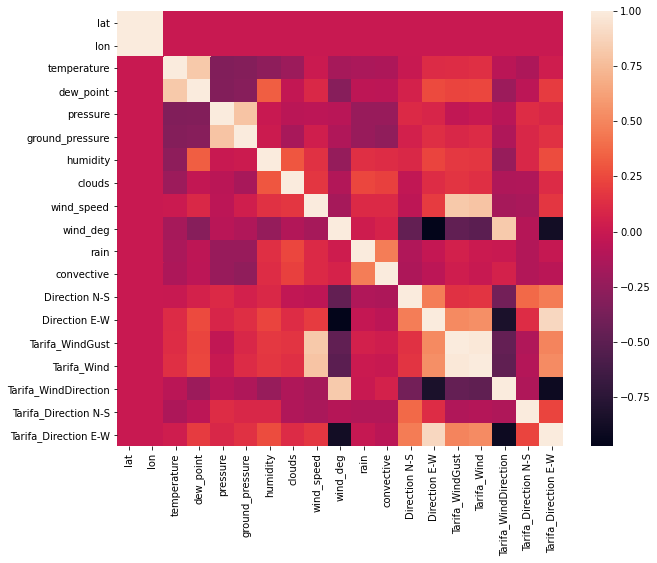

In [46]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df.corr()) 

# Just one last look of the correlations--> Nothing unexpected, the wind and direcitons variables
# of feagtures and targets should have a but of correlation and lat lon are just static parameters.

In [32]:
df.isna().sum() # we still have this na to be treated!

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
ground_pressure           0
humidity                  0
clouds                  793
wind_speed                0
wind_deg                  0
rain                    120
convective              793
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust          29
Tarifa_Wind              19
Tarifa_WindDirection     17
Tarifa_Direction N-S     17
Tarifa_Direction E-W     17
Tarifa Compass            0
dtype: int64

In [40]:
# last but not least we re going to convert to datetime data the column 'slice dt iso'
df['slice dt iso'] = pd.to_datetime(df['slice dt iso'])

In [42]:
df.dtypes

slice dt iso            datetime64[ns]
lat                            float64
lon                            float64
temperature                    float64
dew_point                      float64
pressure                       float64
ground_pressure                float64
humidity                       float64
clouds                         float64
wind_speed                     float64
wind_deg                       float64
rain                           float64
convective                     float64
Direction N-S                  float64
Direction E-W                  float64
Compass                         object
Tarifa_WindGust                float64
Tarifa_Wind                    float64
Tarifa_WindDirection           float64
Tarifa_Direction N-S           float64
Tarifa_Direction E-W           float64
Tarifa Compass                  object
dtype: object

## 2 Data distribution and graphics

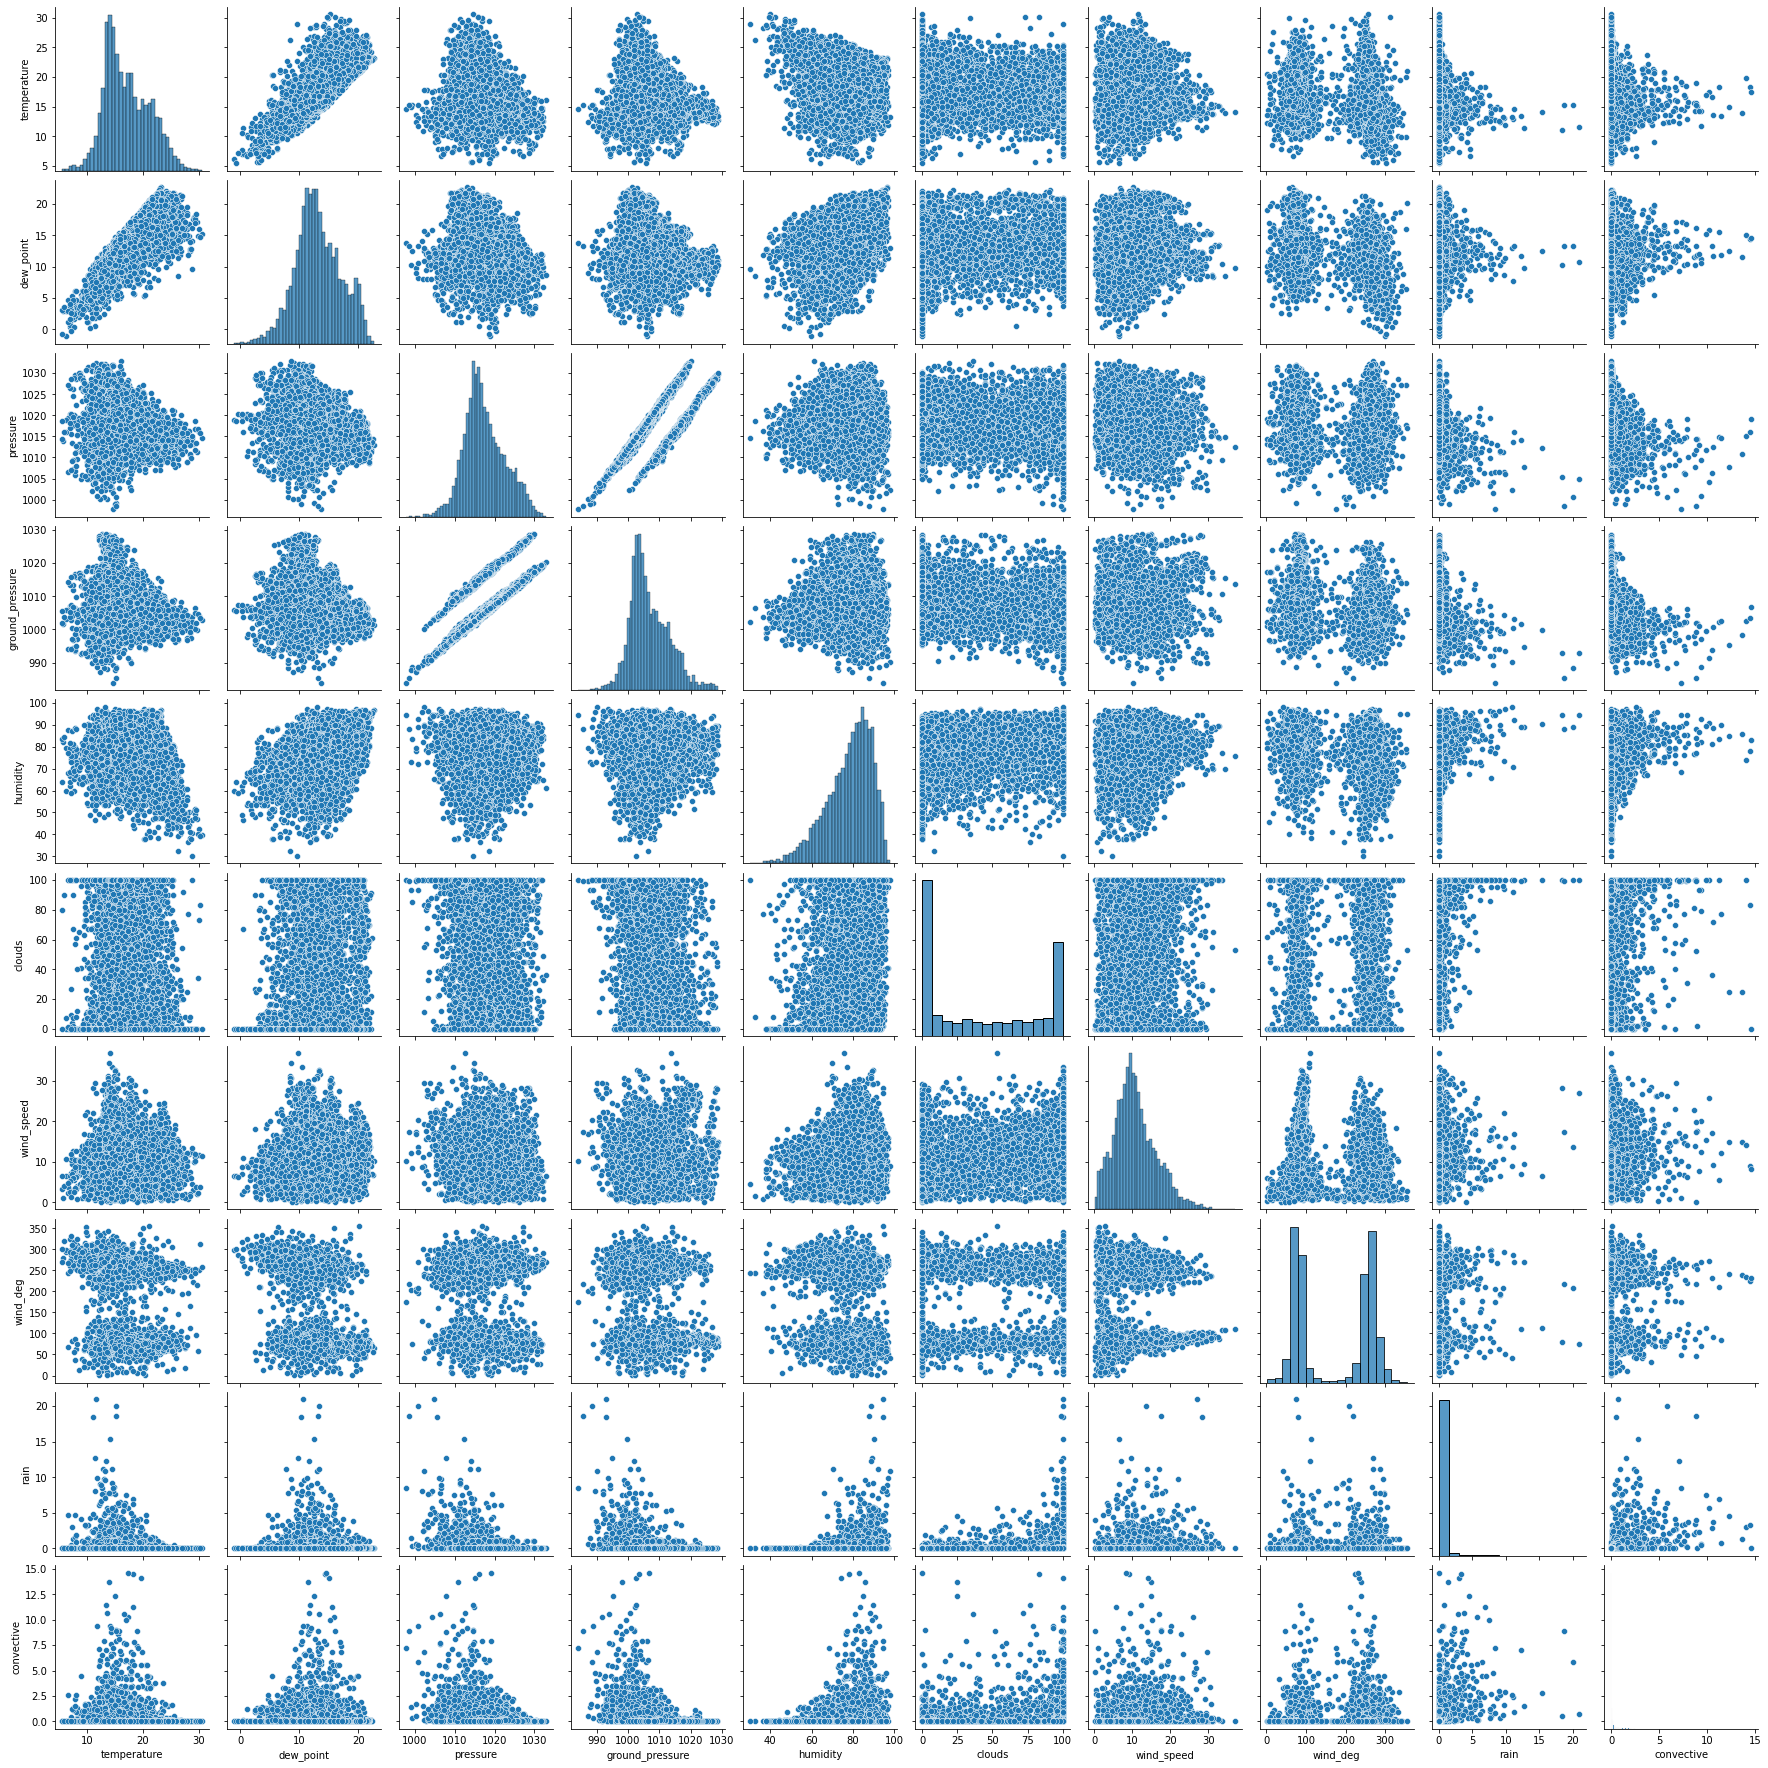

In [55]:
sns.pairplot(df[features])

In this prelimiary pairplot the main insights that we can collect are:
- Wind direction has a clear clustering around E(90º) and W (180º) what is not so surprising as Tarifa is located at stait of gibraltar and due to its particualr geogrphy is famouse for this two main wind directions so called "poniente"(W) and "levante" (E), what surely is going to be an decisive factor in this project. 
- We can see the clear correlations character between temperature <-> dew point and pressure <-> ground pressure. 
- Clouds might be also an important climatic factor beacause there is a clear clustering characher in the 0% and 100% clouds coverage. 

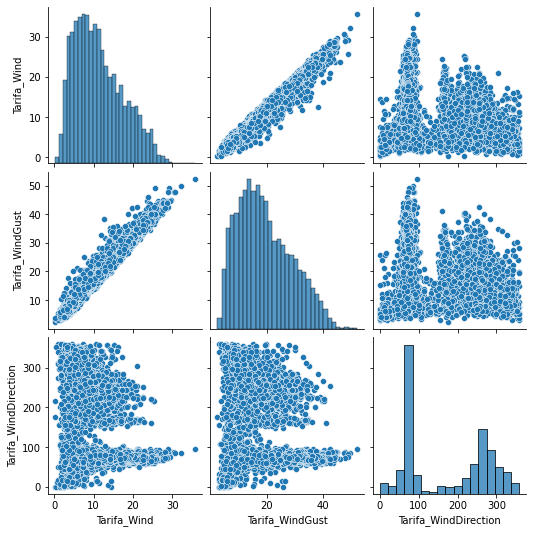

In [59]:
sns.pairplot(df[targets])

Having a look on the target we can see a linear between the wind and the wind gust. Anyhow this varialbe will be important later because the difference between the gust and the mean wind will tell us about the wind quiality. 

The E and W predominant wind directions are also clear, but there the variance in direction with E Wind (levante) looks smaler than with W wind, that can vary much more often from SW to NW. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


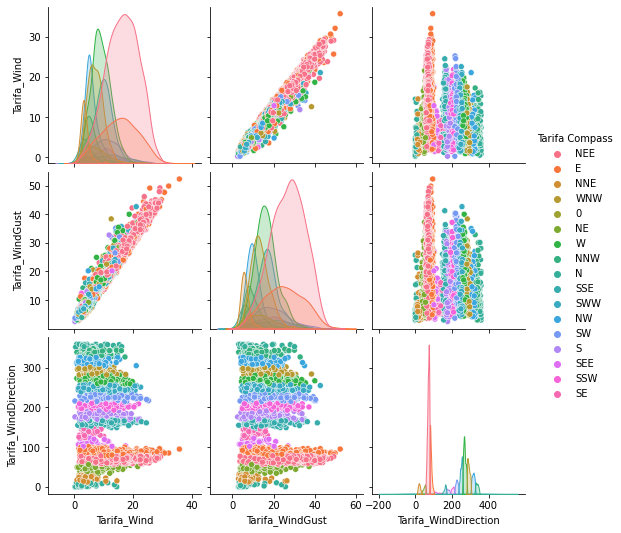

In [60]:
sns.pairplot(df[targets], hue='Tarifa Compass')

Here we can see that E winds tend to blow much stronger than west winds 

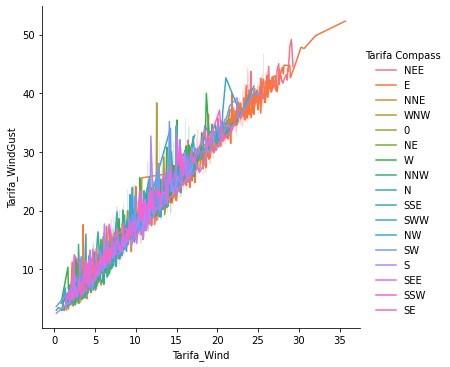

In [67]:
sns.relplot(data=df,x='Tarifa_Wind', y='Tarifa_WindGust',kind='line', hue='Tarifa Compass')

Here we can see that there is a linear correlation between average wind and gust, but it s not very clear yet if the slope is different depending on the direction, lets have a look just in the east and close directions...

<Figure size 720x576 with 0 Axes>

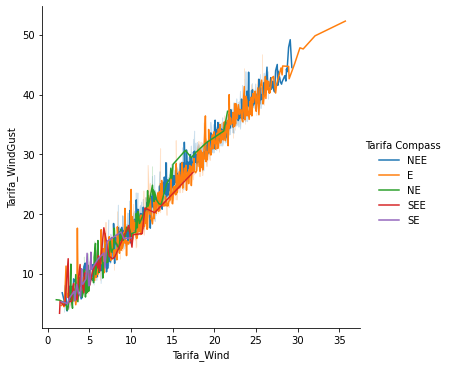

In [92]:
figure = plt.figure(figsize=(10,8))

sns.relplot(data=df[df['Tarifa Compass'].isin(['NE','NEE','E','SEE','SE'])],x='Tarifa_Wind', y='Tarifa_WindGust',kind='line', hue='Tarifa Compass')



Well still not a very clear differnce in the slope depending on the direction of the wind...


## 3 Relation between features (forecast) and actuals mesurements

Let s have a look in the accuracy of the predictions and the effect on features varaibles in the deviation of the actuals vs the forecasted wind.

For that purpose the strategy would be to create a new variable with the error measured between the forecast and the weather station data. DELTA Wind. 

Also for the direction is intereting to meassure the delta angle. We have a problem with 359ª is N wind, and 1ª is N Wind, for that purpose we would use the N/S WE components. 

**Disclaimer.** We re going to find an bias error that could come from the accuracy from the weather station, that we have to see how are going treat it, but what we want to find is it there is any factor that affect the general deviation, what then can be consider as a pure forecast error, non attribuible to bias error. 

In [104]:
df['delta_Wind'] = df['Tarifa_Wind']-df['wind_speed']
df['delta_N-S'] = df['Tarifa_Direction N-S'] - df['Direction N-S'] 
df['delta_E-W'] = df['Tarifa_Direction E-W'] - df['Direction E-W']

In [117]:
newtarget = ['delta_Wind','delta_N-S','delta_E-W']
features = ['temperature', 'dew_point', 'pressure','ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg','rain', 'convective', 'Compass']

In [123]:
df[newtarget].shape

(6346, 3)

In [124]:
df[features].shape

(6346, 11)

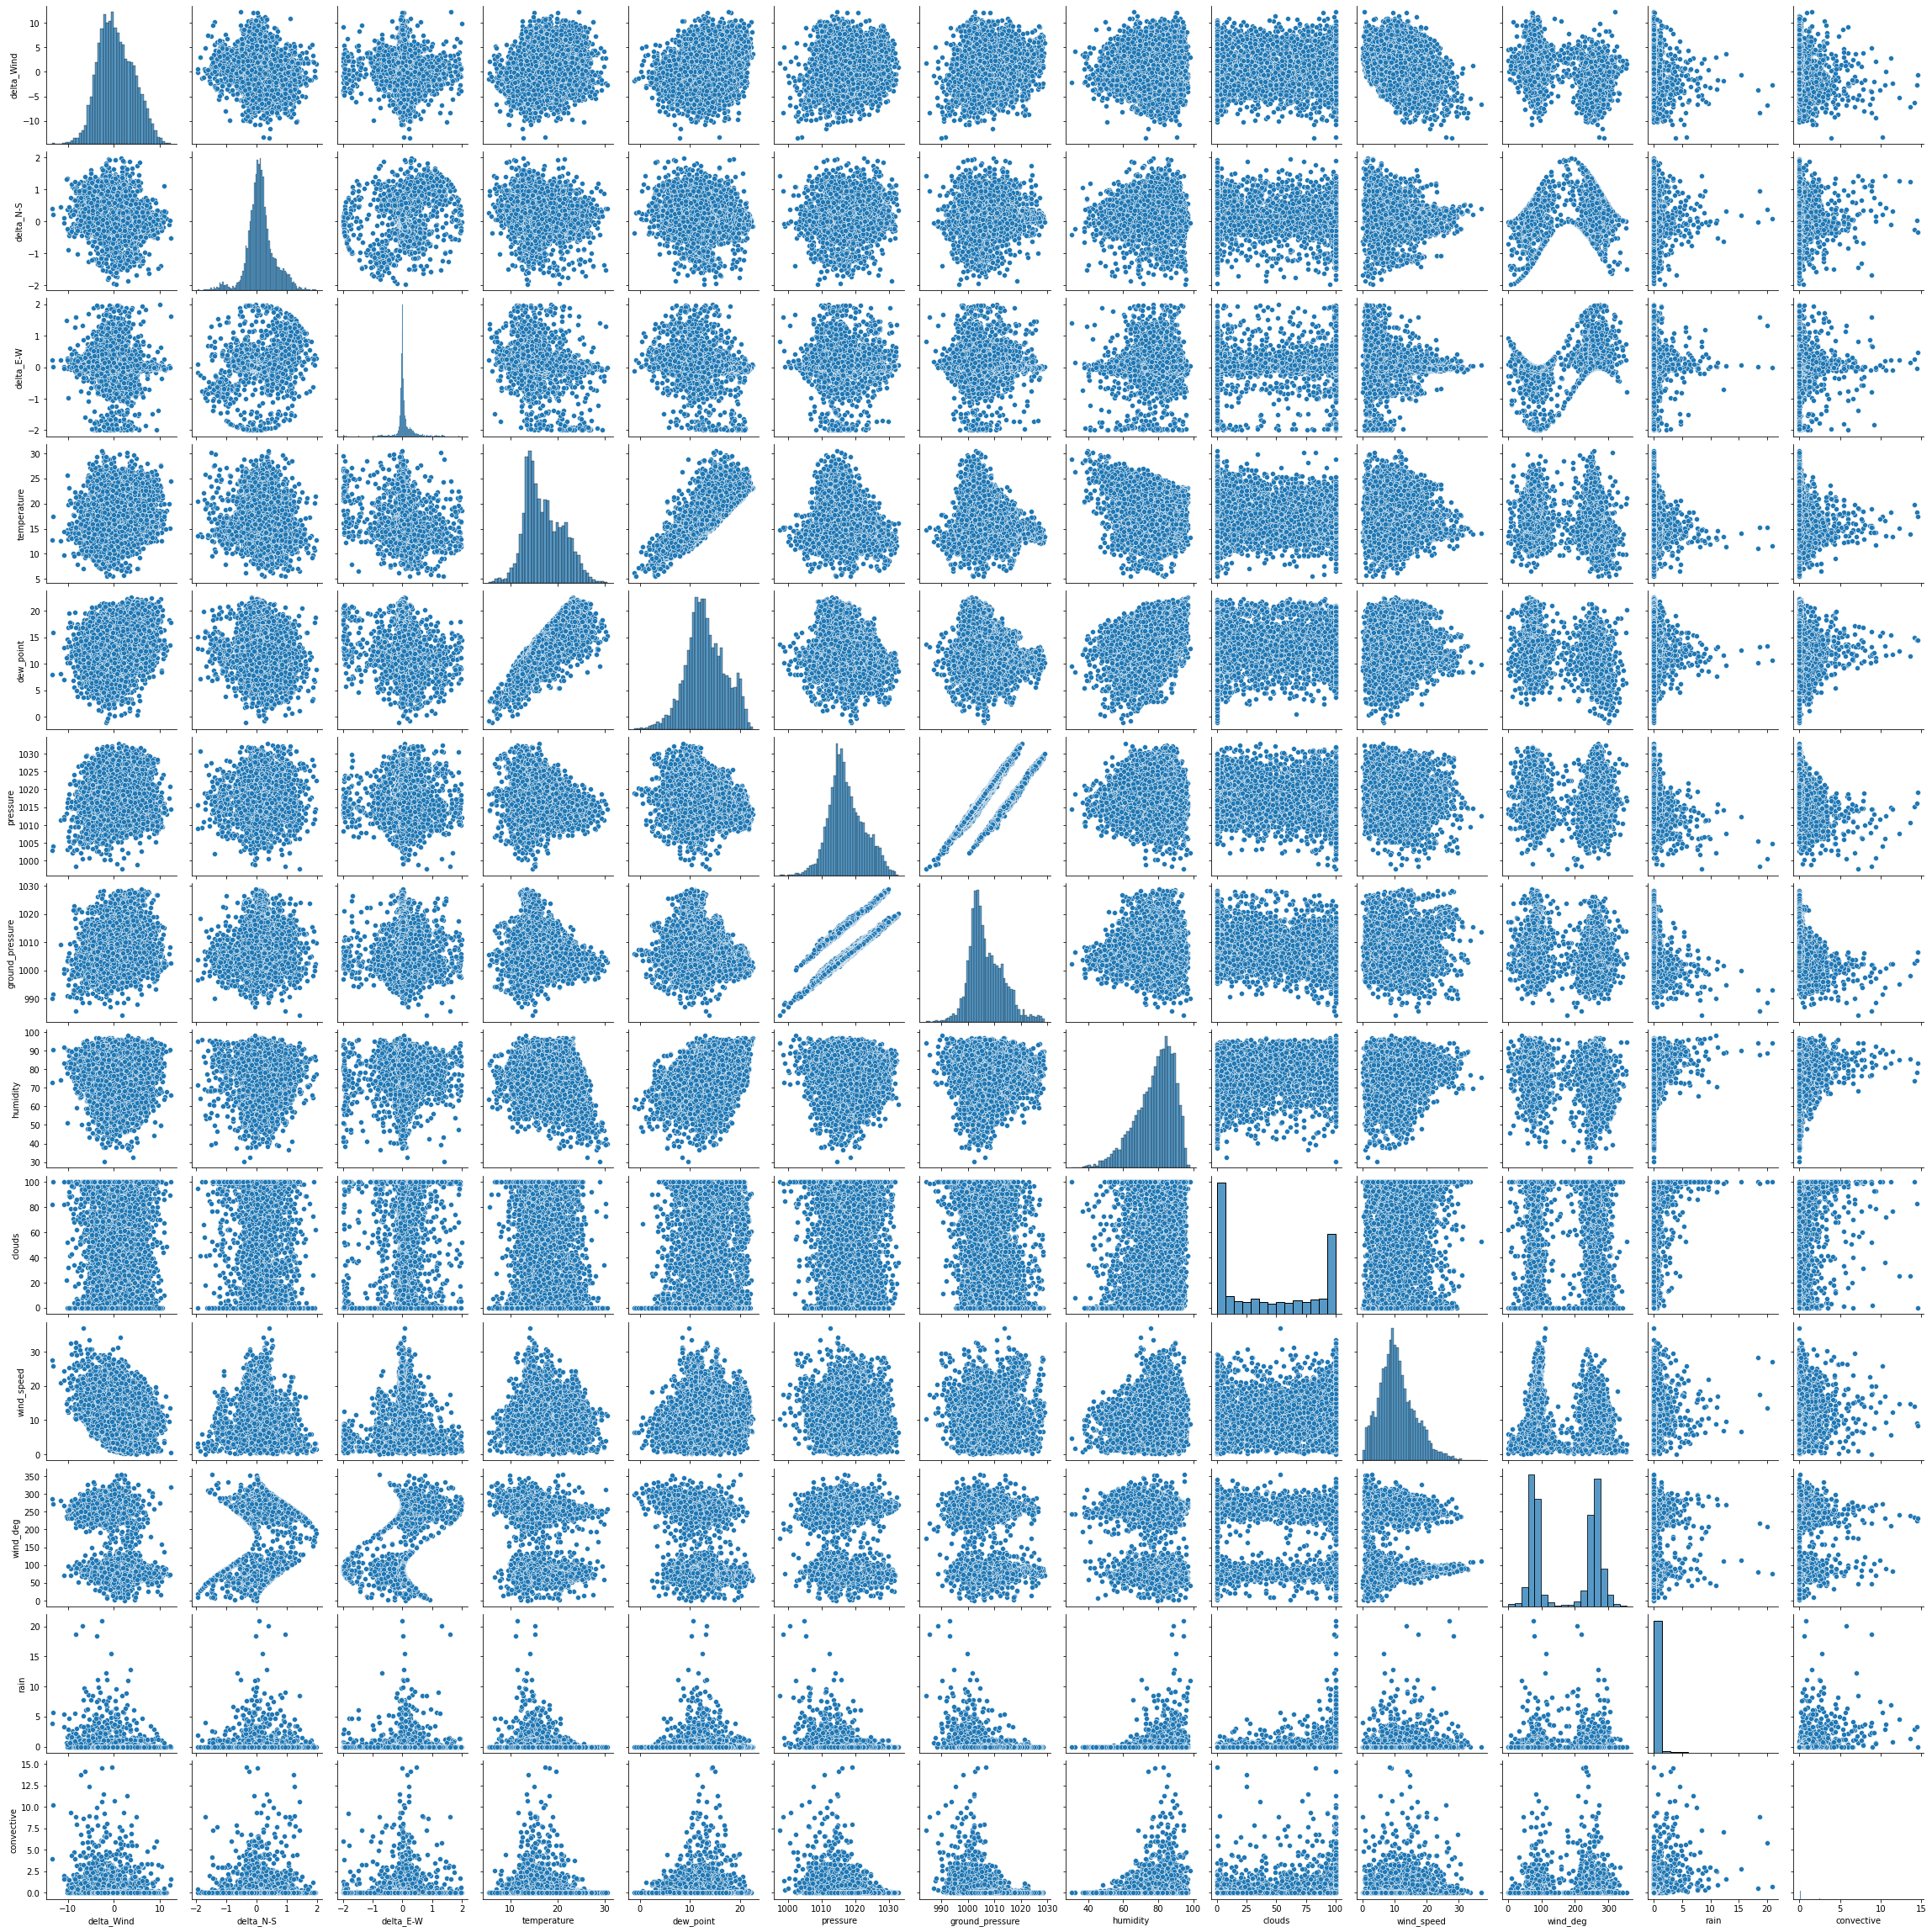

In [127]:
sns.pairplot(pd.concat([df[newtarget],df[features]],axis =1))

let s see in detail just the significant onc se

<AxesSubplot:xlabel='delta_Wind', ylabel='Count'>

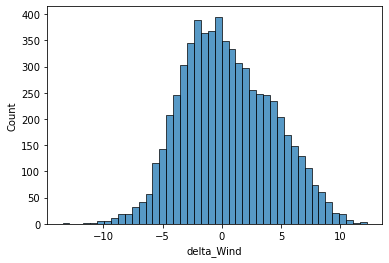

In [128]:
sns.histplot(df['delta_Wind']) 

<AxesSubplot:xlabel='delta_Wind'>

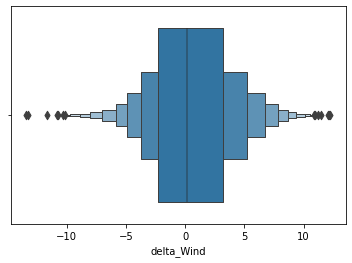

In [133]:
sns.boxenplot(x= df['delta_Wind']) # We can say that the average deviation is pretty centered.

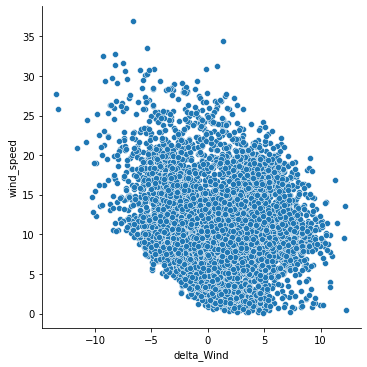

In [143]:
sns.relplot(y = df['wind_speed'], x = df['delta_Wind']) # Here we can see inverse linear relation